<a href="https://colab.research.google.com/github/nata050818/Fundamentos-de-Intelig-ncia-Computacional-e-Ci-ncia-de-Dados/blob/main/Atividade%202.1/Atividade%202.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A

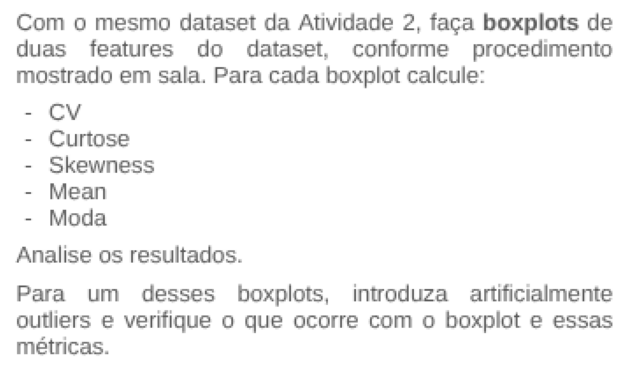

In [22]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Carregar e exibir a imagem
img = mpimg.imread('Atividade_A.png')
plt.figure(figsize=(8, 6))  # Ajusta o tamanho do gráfico (opcional)
plt.imshow(img)
plt.axis('off')  # Remove os eixos
plt.show()

# Base de dados:

## Breast Cancer Wisconsin (Diagnostic)


### Dados relativos a diagnóstico de câncer de mama de Wisconsin.

### variáveis ​características dos núcleos celulares presentes na imagem (entradas) e diagnostico (saídas)

### Wolberg, W., Mangasarian, O., Street, N., & Street, W. (1993). Breast Cancer Wisconsin (Diagnostic) [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.

# Detalhes da base

### Número de identificação

### Diagnóstico (M = maligno, B = benigno)

### São calculadas dez caraterísticas de valor real para cada núcleo de célula:

    radius – raio médio dos núcleos
    
    texture – desvio padrão dos valores de intensidade cinza
    
    perimeter – perímetro
    
    area – área
    
    smoothness – variação local nos comprimentos de raio
    
    compactness – (perímetro² / área - 1.0)
    
    concavity – severidade das concavidades do contorno
    
    concave points – número de pontos côncavos
    
    symmetry – simetria
    
    fractal dimension – "rugosidade" das fronteiras

Para cada uma dessas 10 features, foram computadas 3 estatísticas:

    mean – média
    
    se – erro padrão
    
    worst – valor mais extremo observado

totalizando 10 × 3 = 30 colunas.

In [23]:
pip install ucimlrepo

In [24]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pandas as pd

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Combinar os dados em um único DataFrame
df = pd.concat([X, y], axis=1)

df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [25]:
df["Diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [26]:
df['Diagnosis'] = df['Diagnosis'].map({'B': 0, 'M': 1})

df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


## Verificando se há outliers nas features

In [27]:
# Selecionar todas as colunas menos a última (assumindo que é 'Diagnosis')
features = df.columns[:-1]

# Função para contar outliers via IQR
def count_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((series < lower) | (series > upper)).sum()  #soma os valores tr de outliers


outliers = df[features].apply(count_outliers)

print(outliers)

radius1               14
texture1               7
perimeter1            13
area1                 25
smoothness1            6
compactness1          16
concavity1            18
concave_points1       10
symmetry1             15
fractal_dimension1    15
radius2               38
texture2              20
perimeter2            38
area2                 65
smoothness2           30
compactness2          28
concavity2            22
concave_points2       19
symmetry2             27
fractal_dimension2    28
radius3               17
texture3               5
perimeter3            15
area3                 35
smoothness3            7
compactness3          16
concavity3            12
concave_points3        0
symmetry3             23
fractal_dimension3    24
dtype: int64


## Boxplot das duas Features

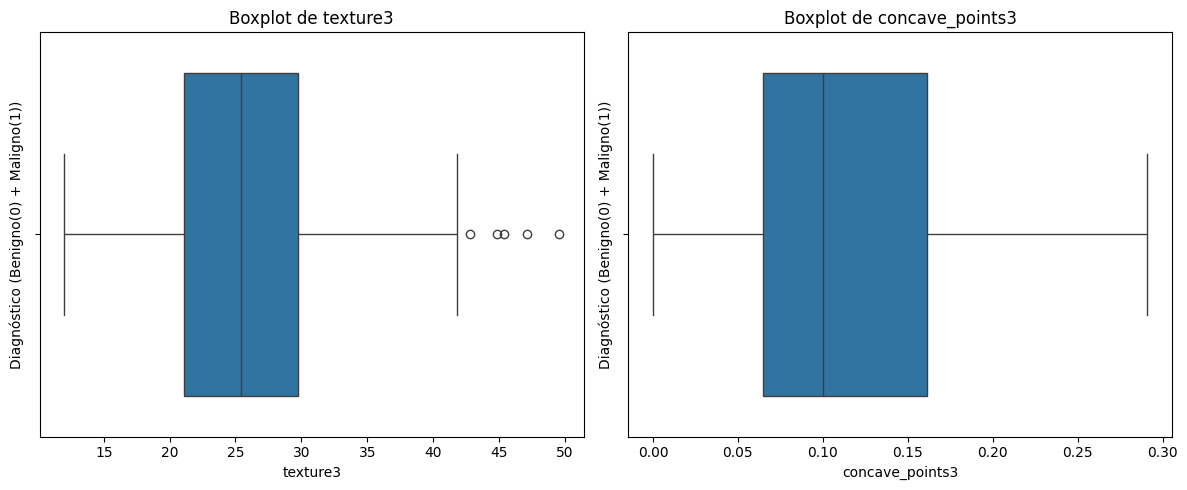

                       CV   Curtose  Skewness      Média  Moda
texture3         0.239366  0.211809  0.497007  25.677223  17.7
concave_points3  0.573549 -0.541367  0.491316   0.114606   0.0


In [28]:
from scipy.stats import kurtosis, skew, mode

def analisar_features_com_boxplot(df, features):
    # Criar a figura
    plt.figure(figsize=(12, 5))

    # Dicionário para guardar as estatísticas
    estatisticas = {}

    # Plotar um boxplot para cada feature
    for i, feature in enumerate(features):
        plt.subplot(1, 2, i + 1)
        sns.boxplot(x=feature, data=df)
        plt.title(f'Boxplot de {feature}')
        plt.ylabel('Diagnóstico (Benigno(0) + Maligno(1))')
        plt.xlabel(feature)

        # Calcular estatísticas
        df_feature = df[feature].dropna()
        media = df_feature.mean()
        desvio = df_feature.std()
        cv = desvio / media if media != 0 else float('nan')
        curtose = kurtosis(df_feature, fisher=True)  # Curtose excessiva (normal ~ 0) kurtosis = kurtose real - 3
        assimetria = skew(df_feature)
        moda = mode(df_feature, keepdims=False).mode  # evita erro de forma

        estatisticas[feature] = {
            'CV': cv,
            'Curtose': curtose,
            'Skewness': assimetria,
            'Média': media,
            'Moda': moda
        }

    plt.tight_layout()
    plt.show()

    # Exibir as estatísticas
    return pd.DataFrame(estatisticas).T


features = ['texture3', 'concave_points3']
estatisticas_df = analisar_features_com_boxplot(df, features)
print(estatisticas_df)

texture3:

    CV (0.239) tem baixa variabilidade, os dados estão mais próximos da média.

    Curtose (0.21) levemente positiva sugerindo distribuição próxima da normal, com caudas moderadas.

    Skewness (0.497) positiva apontando assimetria leve à direita, com mais valores concentrados à esquerda.

    Média (25.68) mostra o valor médio dos dados.

    Moda (17.7) sugere muitos valores próximos desse ponto, abaixo da média.


concave_points3:

    CV (0.574) alto indicando variabilidade, os dados estão mais distantes da média.

    Curtose (-0.54) negativa revelando uma distribuição achatada, com menos outliers extremos.

    Skewness (0.491) positiva apontando assimetria leve à direita, com mais valores concentrados à esquerda.

    Média (0.115) mostra que os valores são, em geral, baixos.

    Moda (0.0) indica forte concentração de valores no zero.

## Introduzindo Outliers na feature

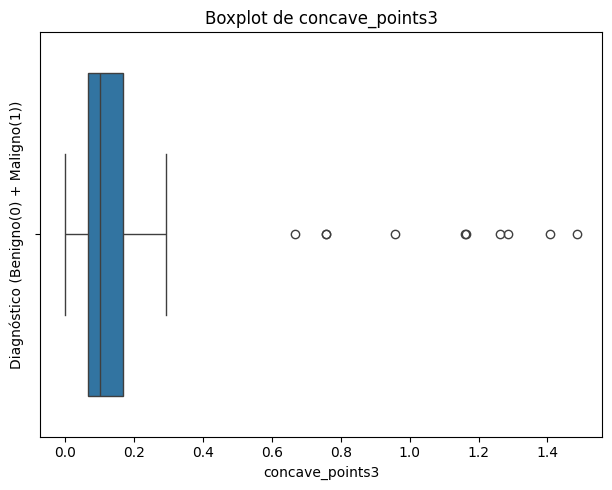

                       CV   Curtose  Skewness    Média  Moda
concave_points3  1.121351  43.08377  5.886274  0.13145   0.0


In [29]:
# Cópia do DataFrame original
df_outlier = df.copy()

# Calcular limites para definir outliers
q1 = df['concave_points3'].quantile(0.25)
q3 = df['concave_points3'].quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr

# Gerar 10 valores outliers (exageradamente altos)
np.random.seed(42)
outlier_vals = np.random.uniform(limite_superior * 2, limite_superior * 5, size=10)

# Criar 10 novas linhas com outliers apenas em 'concave_points3'
# Outras colunas podem ser preenchidas com NaN ou valores neutros
novas_linhas = pd.DataFrame({
    col: [np.nan]*10 for col in df.columns
})
novas_linhas['concave_points3'] = outlier_vals
novas_linhas['Diagnosis'] = -1  # valor fictício para distinguir essas linhas, se quiser

# Adicionar ao DataFrame original
df_outlier = pd.concat([df_outlier, novas_linhas], ignore_index=True)

features = ['concave_points3']
estatisticas_df = analisar_features_com_boxplot(df_outlier, features)
print(estatisticas_df)

CV muito alto (1.12) indica alta variabilidade relativa nos dados.

Curtose extremamente alta (43.08) mostra caudas muito pesadas e muitos outliers extremos (Leptocúrtico).

Skewness alta positiva (5.89) indica forte assimetria à direita, com muitos valores grandes.

Média baixa (0.13), apesar dos valores altos

Moda em 0.0 mostra concentração dos dados no valor zero.

A introdução dos outliers em concave_points3 elevou o coeficiente de variação e aumentou drasticamente a curtose e a assimetria, indicando caudas muito mais pesadas e uma forte inclinação à direita.A média e a moda permaneceram próximas dos valores originais.

# B

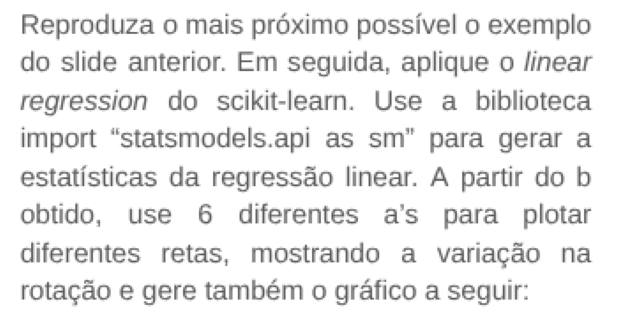

In [30]:
# Carregar e exibir a imagem
img = mpimg.imread('Atividade_B.png')
plt.figure(figsize=(8, 6))  # Ajusta o tamanho do gráfico (opcional)
plt.imshow(img)
plt.axis('off')  # Remove os eixos
plt.show()

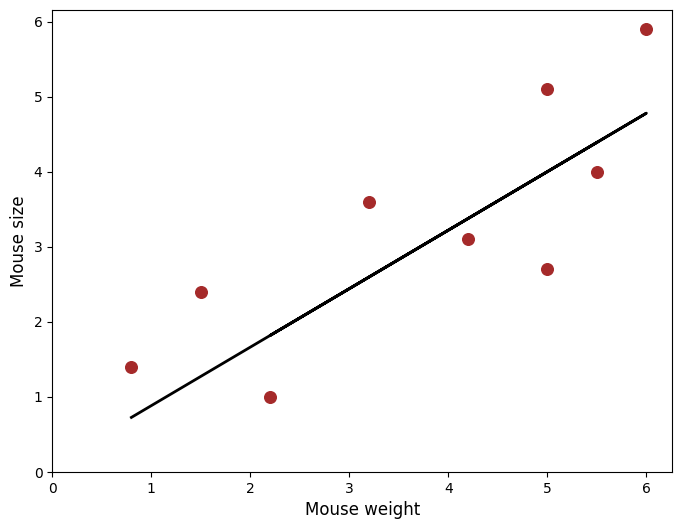

In [31]:
# Dados de exemplo aproximados dos pontos
mouse_weight = np.array([0.8, 1.5, 3.2, 5, 6,    2.2, 4.2, 5.0, 5.5])
mouse_size = np.array([1.4, 2.4, 3.6, 5.1, 5.9,   1, 3.1, 2.7, 4])

plt.figure(figsize=(8,6))

# Scatter plot dos pontos
plt.scatter(mouse_weight, mouse_size, color='brown', s=70)

# Linha de regressão (equação dada)
y_line = 0.1 + 0.78 * mouse_weight #equação da reta fornecida
plt.plot(mouse_weight, y_line, color='black', linewidth=2)

# Eixos
plt.xlabel('Mouse weight', fontsize=12)
plt.ylabel('Mouse size', fontsize=12)

plt.xticks(np.arange(0, 7, 1))
plt.yticks(np.arange(0, 7, 1))

plt.show()

Reta: y = 0.70x + 0.65
R-squared: 0.66

Resumo do modelo (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     13.53
Date:                Thu, 22 May 2025   Prob (F-statistic):            0.00787
Time:                        23:30:53   Log-Likelihood:                -11.668
No. Observations:                   9   AIC:                             27.34
Df Residuals:                       7   BIC:                             27.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


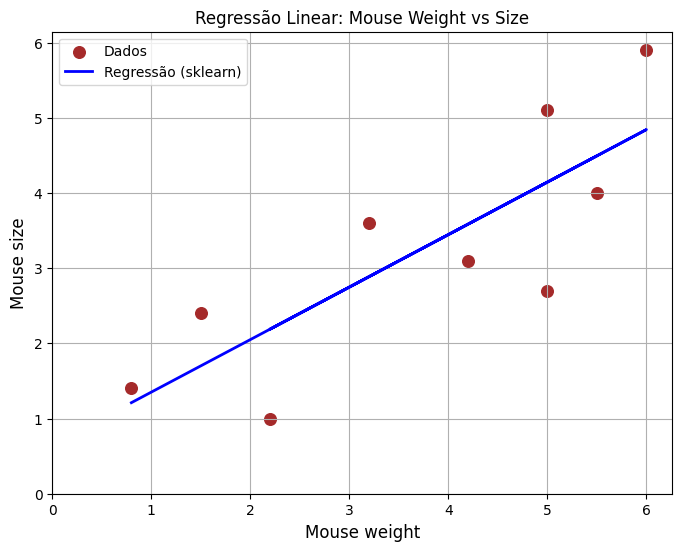

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm


# Ajuste com scikit-learn
X = mouse_weight.reshape(-1, 1) #transfrma em matriz de 1 coluna e 9 linhas para o sklearn
y = mouse_size

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
slope = model.coef_[0]
intercept = model.intercept_

# Calcula o R-squared
r_squared = r2_score(y, y_pred)

print(f"Reta: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-squared: {r_squared:.2f}")

# Ajuste com statsmodels para obter estatísticas completas
X_sm = sm.add_constant(X)  # adiciona a constante (intercepto)
ols_model = sm.OLS(y, X_sm).fit()
print("\nResumo do modelo (statsmodels):")
print(ols_model.summary())

# Gráfico
plt.figure(figsize=(8, 6))

# Scatter plot dos pontos
plt.scatter(X, y, color='brown', s=70, label='Dados')

# Linha da regressão do scikit-learn
plt.plot(X, model.predict(X), color='blue', linewidth=2, label='Regressão (sklearn)')


# Eixos
plt.xlabel('Mouse weight', fontsize=12)
plt.ylabel('Mouse size', fontsize=12)
plt.xticks(np.arange(0, 7, 1))
plt.yticks(np.arange(0, 7, 1))
plt.legend()
plt.title('Regressão Linear: Mouse Weight vs Size')
plt.grid(True)
plt.show()


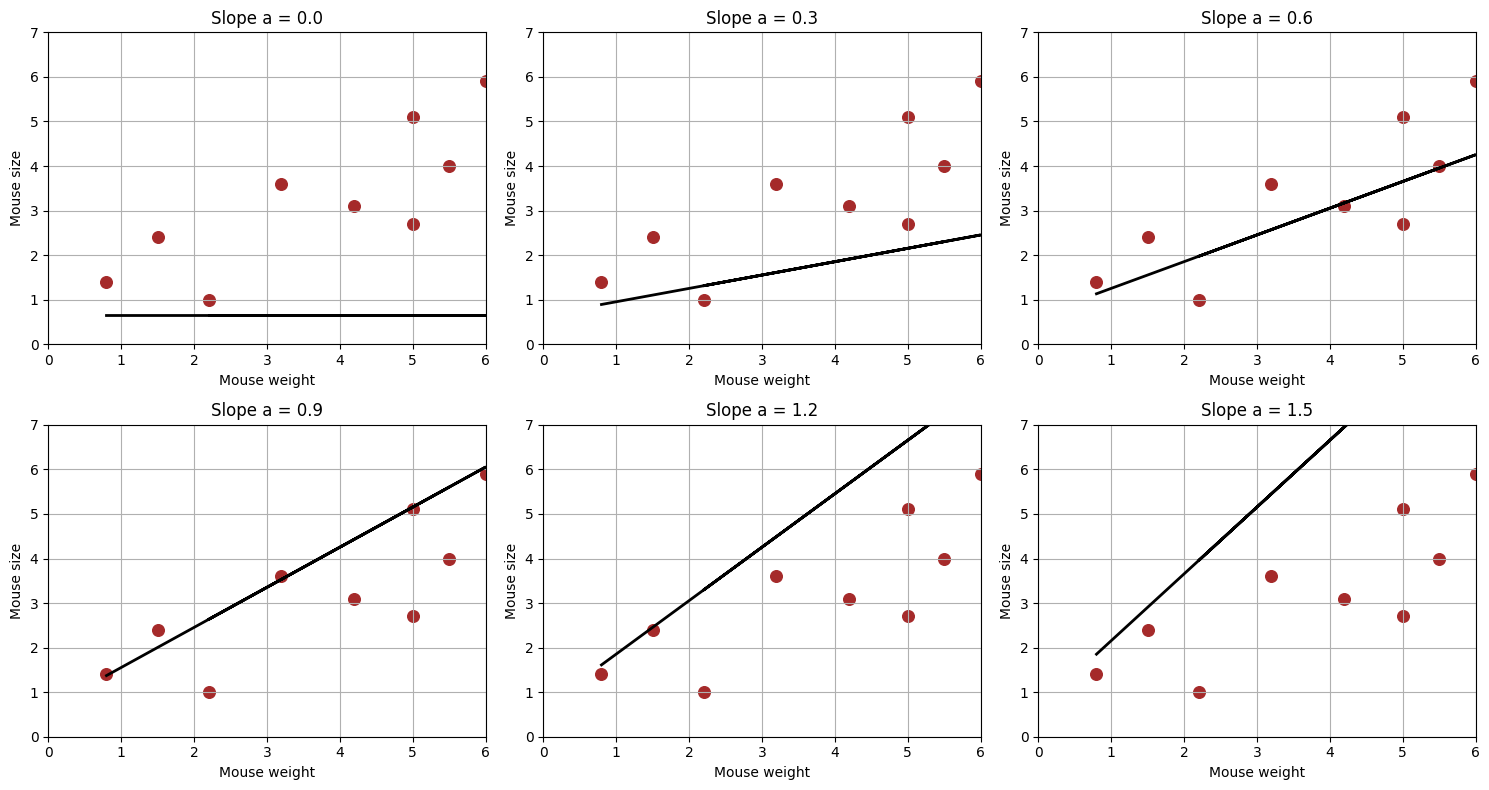

In [33]:
# Slopes a testar
a_vals = [0.0, 0.3, 0.6, 0.9, 1.2, 1.5]

# Armazenamento de resíduos e R²
squared_errors = []
r_squared_vals = []

# Subplots lado a lado (2 linhas x 3 colunas)
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()

for i, a in enumerate(a_vals):

    # calculando a reta manualmente com o novo a
    y_pred_custom = a * X + intercept
    ssr = np.sum((y - y_pred_custom) ** 2)
    r2 = r2_score(y, y_pred_custom)

    squared_errors.append(ssr)
    r_squared_vals.append(r2)

    # Scatter plot dos pontos
    axs[i].scatter(X, y, color='brown', s=70, label='Dados')
    axs[i].plot(X, y_pred_custom, color='black', linewidth=2)
    axs[i].set_title(f'Slope a = {a}')
    axs[i].set_xlim(0, 6)
    axs[i].set_ylim(0, 7)
    axs[i].grid(True)

    axs[i].set_xlabel("Mouse weight")
    axs[i].set_ylabel("Mouse size")

plt.tight_layout()
plt.show()

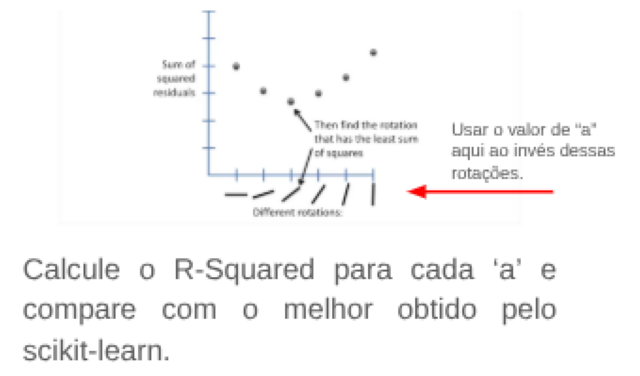

In [34]:
# Carregar e exibir a imagem
img = mpimg.imread('Atividade_B-2.png')
plt.figure(figsize=(8, 6))  # Ajusta o tamanho do gráfico (opcional)
plt.imshow(img)
plt.axis('off')  # Remove os eixos
plt.show()

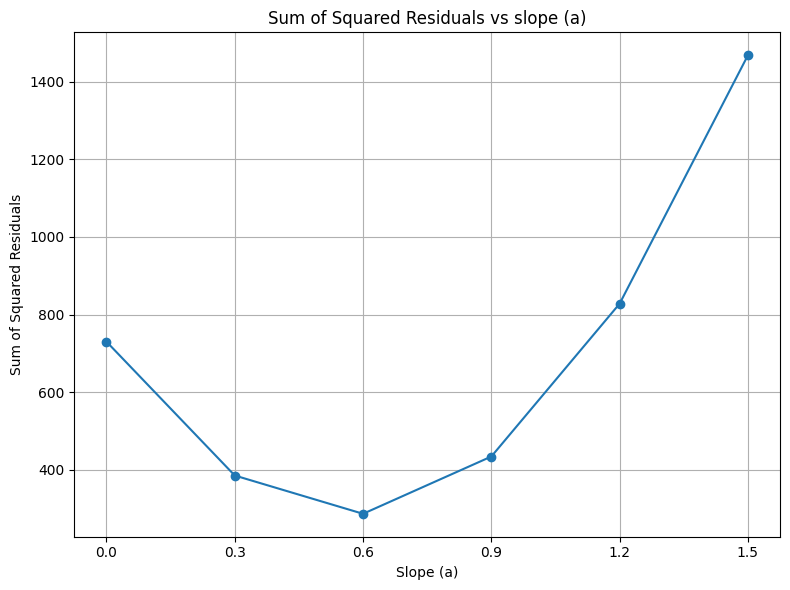

In [35]:
# Gráfico
plt.figure(figsize=(8, 6))

# Subplot 2: Sum of Squared Residuals vs a
plt.plot(a_vals, squared_errors, marker='o')
plt.title("Sum of Squared Residuals vs slope (a)")
plt.xlabel("Slope (a)")
plt.ylabel("Sum of Squared Residuals")
plt.xticks(a_vals)  # Garante que os ticks do eixo X são os valores testados
plt.grid(True)

plt.tight_layout()
plt.show()

In [36]:
import pandas as pd
# Criar o DataFrame
df_r2 = pd.DataFrame([r_squared_vals], columns=a_vals)
df_r2.index = ['R_squared']

# Mostrar o DataFrame
print(df_r2)
print()
print(f"R-squared(regressao linear): {r_squared:.5f}")
print(f"Reta: y = [{slope:.2f}] x + {intercept:.3f}")

                0.0       0.3      0.6       0.9       1.2       1.5
R_squared -2.927248 -0.508291  0.58773  0.360815 -1.189036 -4.061823

R-squared(regressao linear): 0.65910
Reta: y = [0.70] x + 0.652


Os valores de R-square(R²) para os slopes variaram bastante: apenas os slopes 0.6 (0.588) e 0.9 (0.361) apresentaram valores positivos, indicando algum grau de ajuste, enquanto os demais slopes tiveram R² negativos, mostrando que esses modelos tiveram um desempenho pior que uma linha horizontal. O valor do R² da regressão linear geral foi 0.659, superior a todos os valores individuais, demonstrando que o ajuste da regressão é o melhor entre as opções avaliadas.

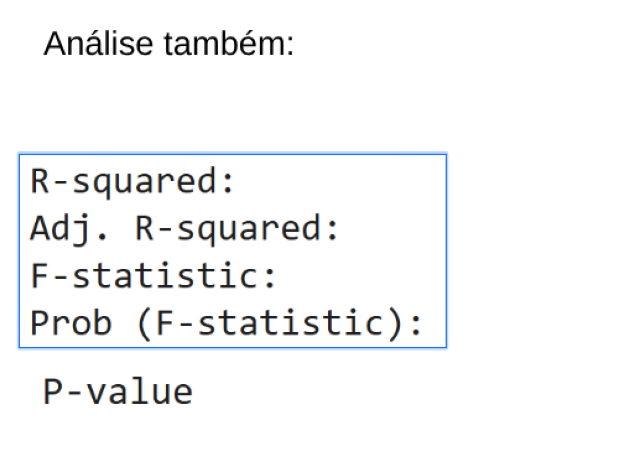

In [38]:
# Carregar e exibir a imagem
img = mpimg.imread('Atividade_B-3.png')
plt.figure(figsize=(8, 6))  # Ajusta o tamanho do gráfico (opcional)
plt.imshow(img)
plt.axis('off')  # Remove os eixos
plt.show()

In [39]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     13.53
Date:                Thu, 22 May 2025   Prob (F-statistic):            0.00787
Time:                        23:34:09   Log-Likelihood:                -11.668
No. Observations:                   9   AIC:                             27.34
Df Residuals:                       7   BIC:                             27.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6521      0.780      0.836      0.4

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


R-squared: 0.659
Indica que aproximadamente 65,9% da variabilidade dos dados é explicada pelo modelo. É um bom ajuste, mostrando que o modelo explica uma parte significativa da variação.

Adjusted R-squared (R² ajustado): 0.610
Ajusta o R² para o número de variáveis e tamanho da amostra, penalizando modelos com muitos parâmetros. O valor 0.610, um pouco menor que o R² simples, ainda indica um bom poder explicativo.

F-statistic: 13.53
O valor de F é relativamente alto, indica que o modelo de regressão é estatisticamente significativo, ou seja, ele explica uma parte relevante da variabilidade dos dados.

Prob (F-statistic) = 0.00787
p-valor associado ao teste F. Como é menor que o nível típico de significância (0.05), indica que o modelo é estatisticamente significativo.


O F-statistic de 13.53, com um p-valor de 0.00787, indica que o modelo de regressão é estatisticamente significativo, pelo menos uma das variáveis independentes tem impacto real sobre a variável dependente.